# Atividade de Analise Dados Multimidia

## 1. Carregar o dataset Titanic

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('archive/Titanic-Dataset.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


## 2. Análise Exploratória Rápida

In [5]:
print(df.info())
print(df.describe())
print(df['Survived'].value_counts())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

## 3. Visualizações com matplotlib

In [9]:
plt.style.use('seaborn-v0_8-dark')

### a. Gráfico de Linha

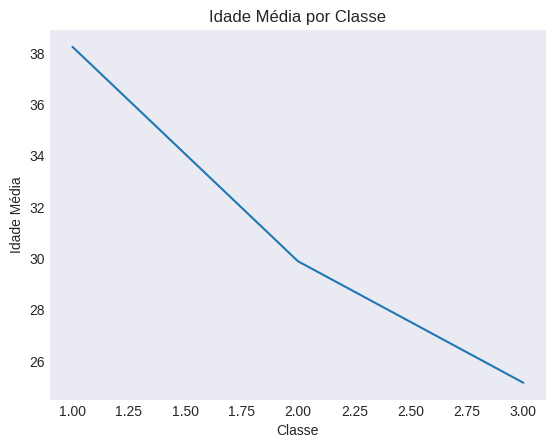

In [11]:
df.groupby('Pclass')['Age'].mean().plot(kind='line', title='Idade Média por Classe')
plt.xlabel('Classe')
plt.ylabel('Idade Média')
plt.show()

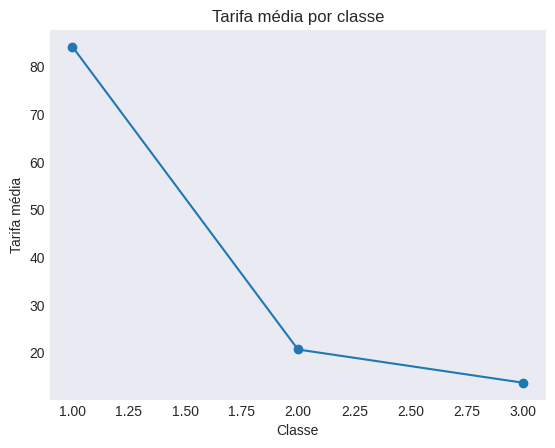

In [25]:
df.groupby('Pclass')['Fare'].mean().plot(kind='line', marker='o', title='Tarifa média por classe')
plt.xlabel('Classe')
plt.ylabel('Tarifa média')
plt.show()

### b. Gráfico de Barras (exemplo: sobreviventes por sexo)

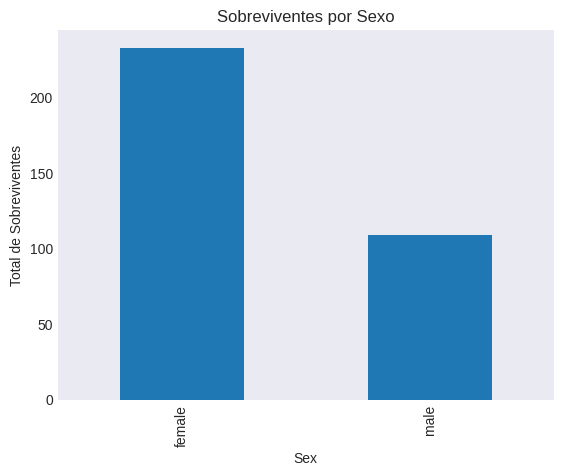

In [12]:
df.groupby('Sex')['Survived'].sum().plot(kind='bar', title='Sobreviventes por Sexo')
plt.ylabel('Total de Sobreviventes')
plt.show()

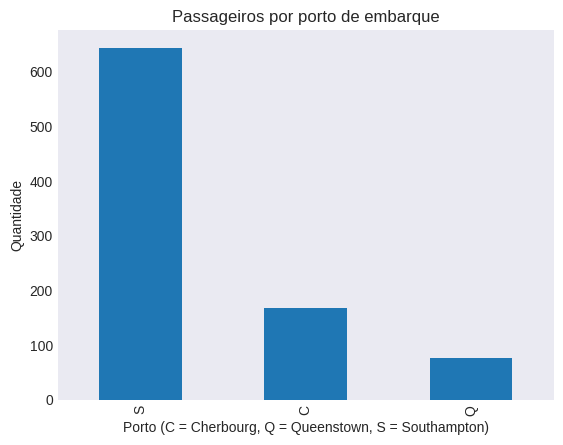

In [26]:
df['Embarked'].value_counts().plot(kind='bar', title='Passageiros por porto de embarque')
plt.xlabel('Porto (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Quantidade')
plt.show()

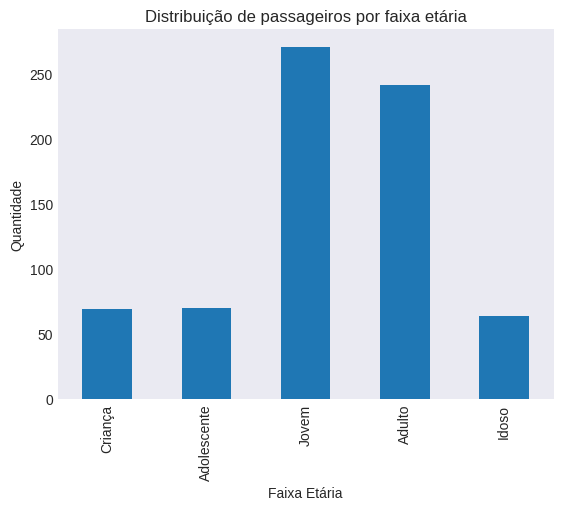

In [27]:
df['FaixaEtaria'] = pd.cut(df['Age'], bins=[0, 12, 18, 30, 50, 80], labels=['Criança', 'Adolescente', 'Jovem', 'Adulto', 'Idoso'])
df['FaixaEtaria'].value_counts().sort_index().plot(kind='bar', title='Distribuição de passageiros por faixa etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade')
plt.show()

### c. Gráfico de Pizza (distribuição por classe)

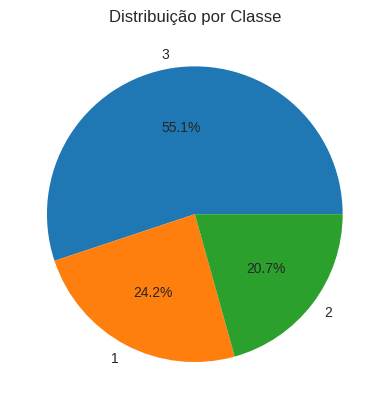

In [13]:
df['Pclass'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Distribuição por Classe')
plt.ylabel('')
plt.show()

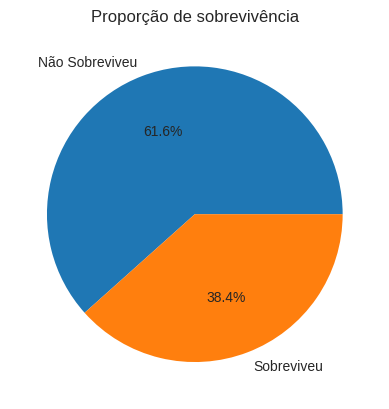

In [28]:
df['Survived'].value_counts().plot(kind='pie', labels=['Não Sobreviveu', 'Sobreviveu'], autopct='%1.1f%%', title='Proporção de sobrevivência')
plt.ylabel('')
plt.show()

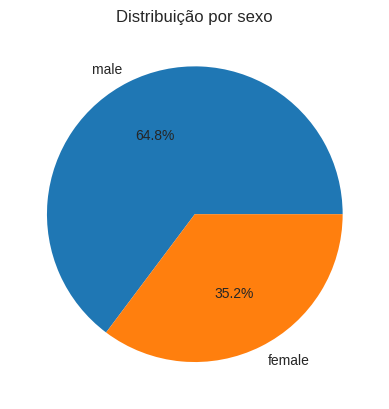

In [29]:
df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Distribuição por sexo')
plt.ylabel('')
plt.show()

### d. Gráfico de Dispersão (idade x tarifa)

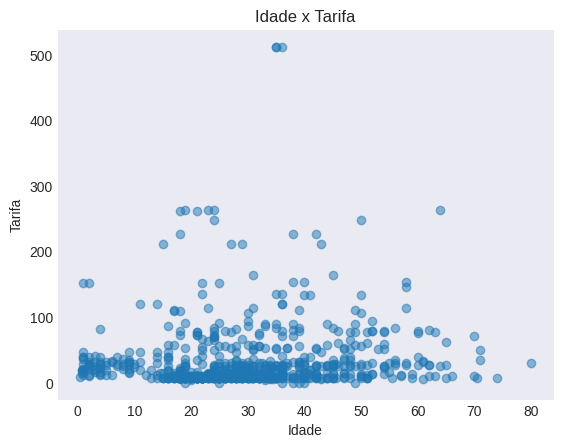

In [14]:
plt.scatter(df['Age'], df['Fare'], alpha=0.5)
plt.title('Idade x Tarifa')
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.show()

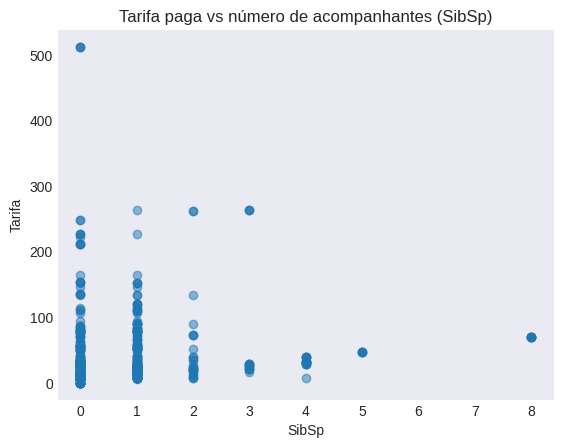

In [36]:
plt.scatter(df['SibSp'], df['Fare'], alpha=0.5)
plt.title('Tarifa paga vs número de acompanhantes (SibSp)')
plt.xlabel('SibSp')
plt.ylabel('Tarifa')
plt.show()

## 4. Desafio Final – Taxas de Sobrevivência

### Por Classe:

In [41]:
taxa_por_classe = df.groupby('Pclass')['Survived'].mean()
print(taxa_por_classe)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


### Por Idade (faixas)

In [22]:
df['FaixaEtaria'] = pd.cut(df['Age'], bins=[0, 12, 18, 30, 50, 80], labels=['Criança', 'Adolescente', 'Jovem', 'Adulto', 'Idoso'])
taxa_por_idade = df.groupby('FaixaEtaria')['Survived'].mean()
print(taxa_por_idade)

FaixaEtaria
Criança        0.579710
Adolescente    0.428571
Jovem          0.355556
Adulto         0.423237
Idoso          0.343750
Name: Survived, dtype: float64


/tmp/ipykernel_174620/3959304735.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_por_idade = df.groupby('FaixaEtaria')['Survived'].mean()


In [23]:
taxa_por_sexo = df.groupby('Sex')['Survived'].mean()
print(taxa_por_sexo)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
